In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from hazm import Normalizer

In [2]:
df = pd.read_csv(r'fill_price.csv')

df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11108\3846424968.py:1: DtypeWarning: Columns (23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'fill_price.csv')


,link,type,date,address,area,floors_sum,homes_num,floor_num,rooms,property_direction,...,address_no_digits,region,latitude,longitude,Gold,facility_count,بخاری,heating,extrahouse,welfare
0,https://www.melkeirani.com/old/melk-77925-%D9%...,فروش آپارتمان,1398/01/17,ارمغان 7,90,4.0,4.0,3.0,2,1,...,ارمغان,11.0,36.347262,59.466991,583900.0,8,1,0,1,2
1,https://www.melkeirani.com/old/melk-77923-%D9%...,فروش آپارتمان,1398/01/17,هاشمیه 59,112,3.0,7.0,3.0,2,1,...,هاشمیه,9.0,36.307539,59.501074,583900.0,12,0,1,3,2
2,https://www.melkeirani.com/old/melk-77917-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی جنوبی 11 و 13,81,6.0,4.0,5.0,2,1,...,حسابی جنوبی,10.0,36.349646,59.495644,583900.0,8,0,0,3,0
3,https://www.melkeirani.com/old/melk-77922-%D9%...,فروش آپارتمان,1398/01/17,کوثر شمالی 30,81,4.0,8.0,3.0,2,2,...,کوثر شمالی,9.0,36.309638,59.510348,583900.0,10,1,0,3,2
4,https://www.melkeirani.com/old/melk-77909-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی شمالی 35 و 37,175,4.0,4.0,2.0,3,1,...,حسابی شمالی,10.0,36.362017,59.504458,583900.0,17,0,1,3,3


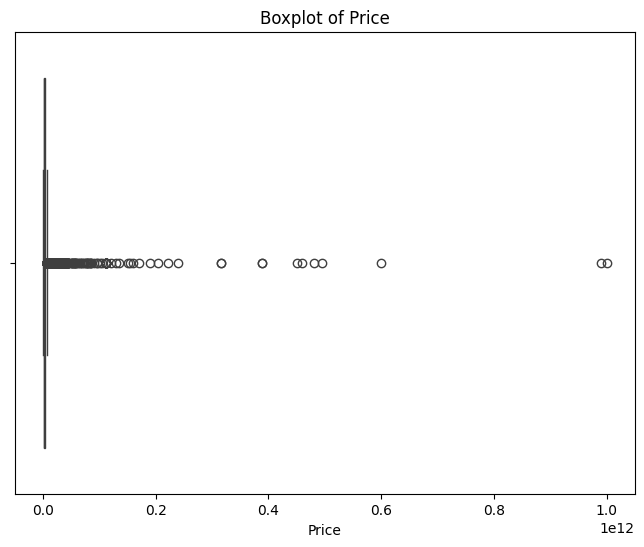

In [3]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()


In [4]:
threshold = 0.3e12

df = df[df['price'] <= threshold]


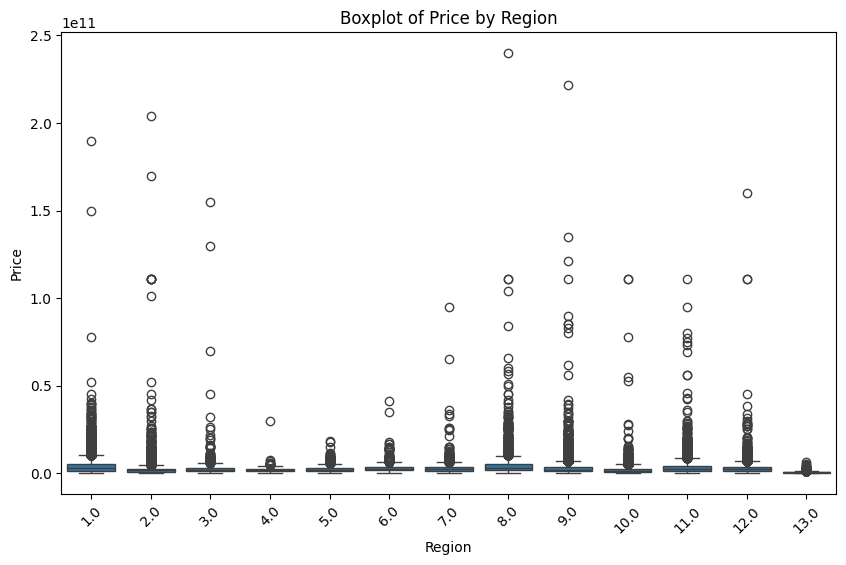

In [5]:
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x='region', y='price', data=df)

# Add title and labels
plt.title('Boxplot of Price by Region')
plt.xlabel('Region')
plt.ylabel('Price')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if there are many regions
plt.show()

In [6]:
df['pricePERmeter'] = df['price'] / df['area']

In [7]:
df['mean_price_by_date'] = df.groupby('date')['price'].transform('mean')

# Calculate mean of price by each date and region
df['mean_price_by_date_region'] = df.groupby(['date', 'region'])['price'].transform('mean')

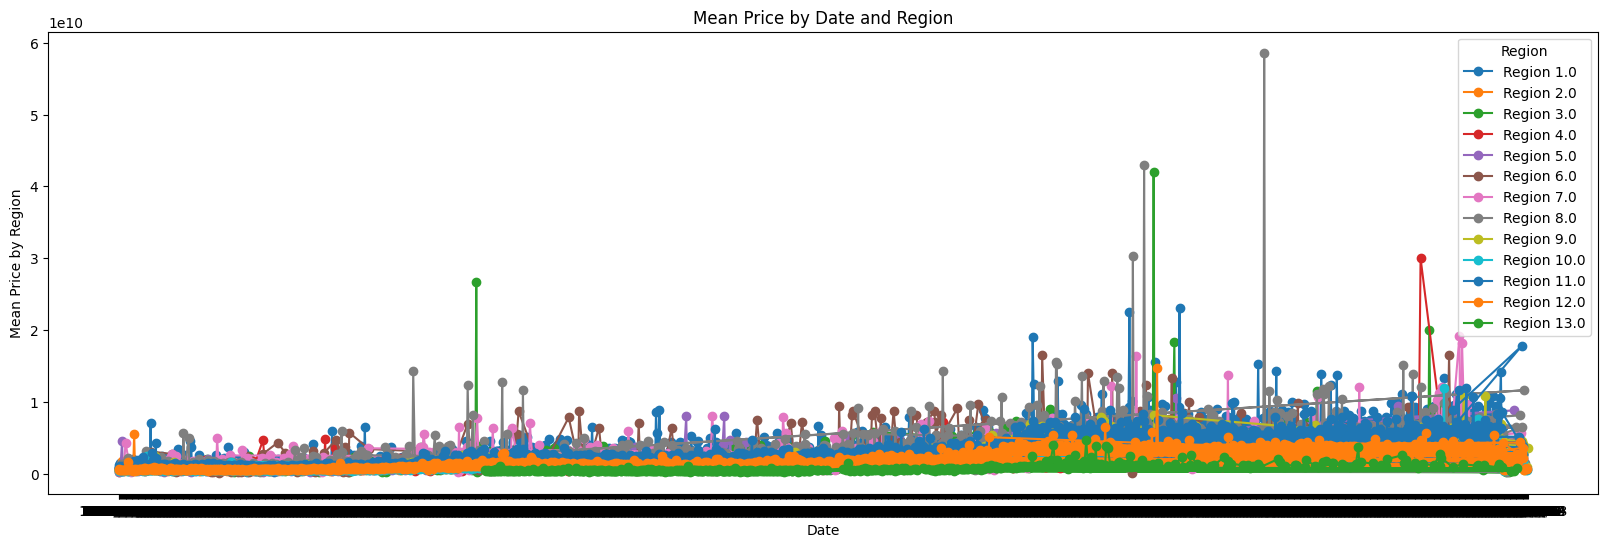

In [9]:
plot_data = df[['date', 'region', 'mean_price_by_date_region']].drop_duplicates()

# Create the line plot
plt.figure(figsize=(20, 6))
for region, group in plot_data.groupby('region'):
    plt.plot(group['date'], group['mean_price_by_date_region'], marker='o', label=f'Region {region}')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Mean Price by Region')
plt.title('Mean Price by Date and Region')
plt.legend(title="Region")
# plt.grid(True)
plt.show()

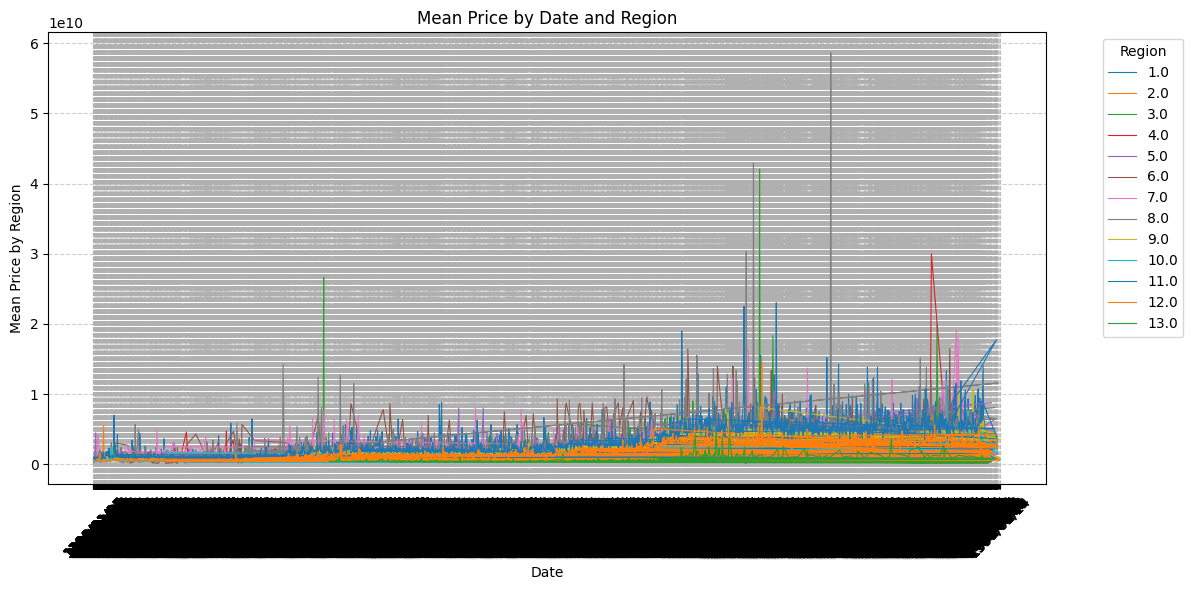

In [14]:
plt.figure(figsize=(12, 6))
for region, group in df.groupby('region'):
    plt.plot(group['date'], group['mean_price_by_date_region'], label=region, linewidth=0.8)  # Thinner lines

# Set x-axis ticks to every 15 days
plt.xticks(df['date'][::15], rotation=45)  # Tick labels every 15 days
plt.xlabel('Date')
plt.ylabel('Mean Price by Region')
plt.title('Mean Price by Date and Region')
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside plot
plt.grid(True, linestyle='--', alpha=0.6)  # Add gridlines for clarity
plt.tight_layout()  # Adjust layout for better visualization
plt.show()